## Lesson Objectives 

- Provide overview of Reinforcement Learning 
- Describe Markov Decision Processes (MDPs) 
- Implement Value and Policy Iteration 
- Actor-Critic Methods 
- Case Study: Optimizing Tax Collections with Constrained Value Iteration 

## Introduction to Reinforcement Learning

Reinforcement Learning is the _computational_ approach to learning from interaction (Sutton & Barto). Autonomous agents performing goal-oriented learning based on experience is the holy-grail of AI. Reinforcement Learning has a rich history with many successes in variety of different application areas. Before 2012, Reinforcement Learning achieved big wins in areas where you can model the dynamics of the underlying system well and subsequently apply planning algorithms to do the ultimate optimization. Pre-2012 wins in RL include: 

- **[[1992] TD-Gammon](http://www.bkgm.com/articles/tesauro/tdl.html)**: Tesauro et al. trained a multi-layer perceptron with Temporal Difference Learning and Self-Play  to beat the world's best Backgammon players. 

- **[[2004] Autonomous Helicopter Aerobatics through Apprenticeship Learning](https://cs.stanford.edu/~acoates/papers/AbbeelCoatesNg_IJRR2010.pdf)**: Ng et al. learnt the _dynamics of the model_ through expert flight trajectories and then applied an optimal control and dynamic programming to achieve state of the art in aerobatic helicopter flight. 

- **[[2011] Optimizing Tax Collections Constrained Reinforcement Learning](https://pdfs.semanticscholar.org/ddb1/fab21ebf37b1eb71c90844ec273d38ebf1bc.pdf)**: Melville et al. optimized tax collections for the New York state government leading to \$120-150 Million in savings for the state over the course of three years. 
--- 
More recently, state of the art in Reinforcement Learning is leveraging recent advances in Deep Neural Networks which has created a new field called Deep Reinforcement Learning. 
<p>
<img src=https://spectrum.ieee.org/image/MjczNjQ4NA.gif>
<center> <em> Distributed Data Collection for Robots Learning to Grasp </em> </center>
</p> 

- **[[2013] Human-level performance on many Atari games](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf)**: Leveraging Convolutional Neural Networks and Q-Learning to surpass human performance in many Atari games. 
- **[[2016] AlphaGo and its successors](https://deepmind.com/research/alphago/)**: Probably the most famous result in modern Deep RL where Silver et al. beat world's best players in Go with MCTS and Neural Networks to represent the value function. 
- **[[2018] Learning Grasping and Dexterity](https://arxiv.org/abs/1806.10293)**: Recently, team from Google Brain released QT-Opt, a scalable self-supervised vision-based reinforcement learning framework that can leverage over 580k real-world grasp attempts to train a deep neural network Q-function with over 1.2M parameters to perform closed-loop, real-world grasping that generalizes to 96% grasp success on unseen objects




[![IMAGE_ALT_TEXT](http://opexanalytics.com/cnt/uploads/2017/11/LSMW_1.jpg)](https://www.youtube.com/watch?time_continue=8&v=gQa6iWGcGWY)
<center> <em> Optimizing Supply Chains with DQN </em> </center> 

Reinforcement Learning as a paradigm offers a lot of interesting avenues of applications. Despite these successes, industrial applications of RL outside of organizations with easy access to large-scale compute and software infrastructure remain sparse. Wide-spread applications of RL require more sample efficient algorithms and new software tools for doing distributed computing. Our goal with this tutorial is two-fold:

> Provide a solid conceptual foundation for understanding and evaluating existing state of the art RL methods (both strengths and weaknesses).

> Showcase Ray, an emerging distributed execution framework, for experimenting with and deploying large-scale Reinforcement Learning algorithms.

We believe that RL works well on applied problems where: 1.) Gathering simulations and experience is cheap, e.g. games, narrow-domain robotics; 2.) Modelers have access to a compact representation of the environment dynamics to apply approximate dynamic programming.


--- 
### Markov Decision Processes (MDPs)
<img src=https://cdn-images-1.medium.com/max/1600/1*3NziBtrANN6UVltplxwaGA.png>
<center> <em> <a href=http://pavel.surmenok.com/wp-content/uploads/2017/08/contextual-bandits-1.png> Source </em> </center>

Reinforcement Learning involves **agents taking actions in non-stationary environments that maximize the total sum of discounted future rewards.** This likewise gives rise to **Markov Decision Processes** which consists of: 

- *States*: $S$
- *Actions*: $A$
- *Transition Probabilities*: $T(s' | s, a)$
- *A scalar value Reward Function*: $R(s, a)$ 
- *$\gamma$*: Discount Factor which generally represents how much patience an agent should have in an environment. 

Note: The Markov Assumption in *M*DP comes from the fact that:
$$P[S_{t+1} | S_{t}] = P[S_{t+1} | S_1, ... , S_t]$$

#### Let's look at an example MDP...

In [40]:
import gym 
import numpy as np
from gym.envs.toy_text.frozen_lake import FrozenLakeEnv

In [17]:
print(FrozenLakeEnv.__doc__)


    Winter is here. You and your friends were tossing around a frisbee at the park
    when you made a wild throw that left the frisbee out in the middle of the lake.
    The water is mostly frozen, but there are a few holes where the ice has melted.
    If you step into one of those holes, you'll fall into the freezing water.
    At this time, there's an international frisbee shortage, so it's absolutely imperative that
    you navigate across the lake and retrieve the disc.
    However, the ice is slippery, so you won't always move in the direction you intend.
    The surface is described using a grid like the following

        SFFF
        FHFH
        FFFH
        HFFG

    S : starting point, safe
    F : frozen surface, safe
    H : hole, fall to your doom
    G : goal, where the frisbee is located

    The episode ends when you reach the goal or fall in a hole.
    You receive a reward of 1 if you reach the goal, and zero otherwise.

    


**Check for Understanding...**

1. How many states does the `FrozenLake` enviornment have?
2. What is the size of the action set? 
3. What is the reward? 
4. What will be the size of the transition probabilities? 

In [32]:
env = gym.make('FrozenLake-v0')

In [30]:
# accessing the MDP

# accessing state 14
env.env.P[14]

{0: [(0.3333333333333333, 10, 0.0, False),
  (0.3333333333333333, 13, 0.0, False),
  (0.3333333333333333, 14, 0.0, False)],
 1: [(0.3333333333333333, 13, 0.0, False),
  (0.3333333333333333, 14, 0.0, False),
  (0.3333333333333333, 15, 1.0, True)],
 2: [(0.3333333333333333, 14, 0.0, False),
  (0.3333333333333333, 15, 1.0, True),
  (0.3333333333333333, 10, 0.0, False)],
 3: [(0.3333333333333333, 15, 1.0, True),
  (0.3333333333333333, 10, 0.0, False),
  (0.3333333333333333, 13, 0.0, False)]}

In [31]:
# accessing outcome of action 1 in state 14
env.env.P[14][1]

[(0.3333333333333333, 13, 0.0, False),
 (0.3333333333333333, 14, 0.0, False),
 (0.3333333333333333, 15, 1.0, True)]

**Note: This is a stochastic MDP. The first tuple represents going to state 13 by taking action 1 state 14 with probability 0.33 and achieving reward 0.0 without it being the terminal state.** In this toy example, how do we get to our **goal state**? We have access to the MDP and know the transition model so this just becomes a *simple planning problem*.

### Value Iteration 

*Policy* $\pi(a | s) $: Specifies which action to take in a given state $s$. 

*Value Function:* Input state $s$ and outputs the value of being in that state $s$ under a particular policy $\pi$: $V^{\pi}: S \rightarrow \mathbb{R}$

<p>
$$V^{\pi}(s) = R^{\pi}(s) + \gamma \Sigma_{s' \in S} T(s' | s, \pi(a | s))V^{\pi}(s')$$
</p>

Note the recursive update. This can be represented as: 
<p>
$$
\begin{bmatrix}
           V^{\pi}(s_1) \\
           V^{\pi}(s_2)  \\
           \vdots \\
           V^{\pi}(s_n)
         \end{bmatrix} = \begin{bmatrix}
           R^{\pi}(s_1) \\
           R^{\pi}(s_2)  \\
           \vdots \\
           R^{\pi}(s_n)
         \end{bmatrix} + \gamma \begin{bmatrix}
    T(s_1, | s_1, \pi(s_1))       & T(s_2, | s_1, \pi(s_1)) & \dots & T(s_n, | s_1, \pi(s_1)) \\
    T(s_1, | s_2, \pi(s_2))       & T(s_2, | s_2, \pi(s_2)) & \dots & T(s_n, | s_2, \pi(s_1)) \\
    \vdots \ddots \\
    T(s_1, | s_n, \pi(s_n))       & T(s_2, | s_n, \pi(s_n)) & \dots & T(s_n, | s_n, \pi(s_n)) \\
\end{bmatrix}\begin{bmatrix}
           V^{\pi}(s_1) \\
           V^{\pi}(s_2)  \\
           \vdots \\
           V^{\pi}(s_n)
         \end{bmatrix}
$$
</p>

<p>
    $$ V^\pi = R^\pi + \gamma TV^\pi $$ 
</p>


Hence, we can derive an iterative algorithm for computing the value function: 

**Step 1**: Initialize $t=0$, $V^\pi_0(s)$. 

**Step 2**: 
- Repeat Until Convergence. 
    - $V_t^\pi = R^\pi + \gamma T^\pi V_{t-1}^\pi$

Upon convergence, we can compute the optimal control policy: 

$$ \pi^{*}(s) = \arg\max_{\pi} $$ 

#### Intuition for Why This Converges 




In [43]:
# Create MDP for the Frozen-Lake Enviornment 
S = np.arange(env.observation_space.n)
A = np.arange(env.action_space.n)
T = env.env.P

In [142]:
MDP =  tuple
V = np.array

def value_iteration_frozen_lake(mdp: MDP, gamma: float, epsilon: float) -> V: 

    states, actions, transition_probabilities = mdp

    # Initialize the value function 
    V = np.zeros(states.shape)
    
    # Repeat until convergence 
    while True: 
        Q = np.zeros((len(states), len(actions)), dtype=float)
        V_old = V.copy()
        for state in states: 
            for action in actions: 
                for probability, next_state, reward, done in transition_probabilities[state][action]:
                    Q[state][action] += probability * (reward + gamma * V_old[next_state] * (not done))
            V[state] = Q[state].max()
        if np.sum(np.abs(V - V_old)) < epsilon:
            break
    return V
                

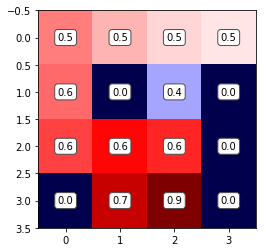

In [173]:
fig, ax = plt.subplots()
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.imshow(value_iteration_frozen_lake((S, A, T), 0.99, 0.001).reshape(4, 4), cmap='seismic')

for (i, j), z in np.ndenumerate(value_iteration_frozen_lake((S, A, T), 0.99, 0.001).reshape(4, 4)):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))



In [158]:
value_iteration_frozen_lake((S, A, T), 0.99, 0.001).reshape(4, 4)

array([[0.539, 0.495, 0.466, 0.452],
       [0.556, 0.   , 0.356, 0.   ],
       [0.59 , 0.641, 0.614, 0.   ],
       [0.   , 0.741, 0.862, 0.   ]])

In [143]:
value_iterationa_frozen_lake((S, A, T), 0.99, 0.001)

array([0.539, 0.495, 0.466, 0.452, 0.556, 0.   , 0.356, 0.   , 0.59 ,
       0.641, 0.614, 0.   , 0.   , 0.741, 0.862, 0.   ])

In [163]:
def value_iteration(S, A, P, gamma=.99, theta = 0.0000001):
 
    V = np.random.random(len(S))
    for i in range(100000):
        old_V = V.copy()
        
        Q = np.zeros((len(S), len(A)), dtype=float)
        for s in S:
            for a in A:
                for prob, s_prime, reward, done in P[s][a]:
                    Q[s][a] += prob * (reward + gamma * old_V[s_prime] * (not done))
            V[s] = Q[s].max()

        if np.all(np.abs(old_V - V) < theta):
            break
    
    pi = np.argmax(Q, axis=1)
    return pi, V

In [164]:
value_iteration(S, A, T)

(array([0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]),
 array([0.542, 0.499, 0.471, 0.457, 0.558, 0.   , 0.358, 0.   , 0.592,
        0.643, 0.615, 0.   , 0.   , 0.742, 0.863, 0.   ]))

In [165]:
T[15]

{0: [(1.0, 15, 0, True)],
 1: [(1.0, 15, 0, True)],
 2: [(1.0, 15, 0, True)],
 3: [(1.0, 15, 0, True)]}

In [44]:
# Let's see what this looks like in code. 
convergence_epsilon = 0.001
V = np.zeros_like(S)
while True: 
    old_V = V.copy()
    for s in S: 
        V[s] = 
        